#Exploratory Data Analysis (EDA)

Мета:
- ознайомитись з даними
- перевірити якість
- зрозуміти, які ознаки корисні для моделі

##Огляд набору даних

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Final_Project/quora_question_pairs_train_.csv')

In [4]:
pd.set_option('display.max_colwidth', None)


In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,332278,459256,459257,The Iliad and the Odyssey in the Greek culture?,How do I prove that the pairs of three independent variables is also independent?,0
1,196656,297402,297403,What is practical management and what is strategic management?,What are the practical aspects of strategic management?,0
2,113125,184949,184950,How useful is MakeUseOf Answers?,"Is there any Q&A site that is not Yahoo answers, where hate speech is allowed?",0
3,266232,101283,163744,Which is the best place to reside in India and Why?,Which ia the best place to visit in India?,0
4,122738,17811,27517,Why do so many people ask questions on Quora that can be easily answered by any number of legitimate sources on the Web? Have they not heard of Google or Bing?,Why don't many people posting questions on Quora check Google first?,1


In [6]:
df[df['is_duplicate'] != 0].head()

,id,qid1,qid2,question1,question2,is_duplicate
4,122738,17811,27517,Why do so many people ask questions on Quora that can be easily answered by any number of legitimate sources on the Web? Have they not heard of Google or Bing?,Why don't many people posting questions on Quora check Google first?,1
8,402631,176809,185587,What is the best small business to start in Nagpur?,Which business/startup should I start in Nagpur which will have best chances of survival?,1
11,346061,70709,109144,How can I open a PPF account? And what are its benefits?,What is PPF account?,1
12,65247,6421,68425,"What is the Sahara, and how do the average temperatures there compare to the ones in the Antarctica?","What is the Sahara, and how do the average temperatures there compare to the ones in the Gibson Desert?",1
15,138940,41576,106451,Is a third World War imminent?,Will there be a third World War?,1


In [7]:
df.shape

(323432, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323432 entries, 0 to 323431
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            323432 non-null  int64 
 1   qid1          323432 non-null  int64 
 2   qid2          323432 non-null  int64 
 3   question1     323431 non-null  object
 4   question2     323430 non-null  object
 5   is_duplicate  323432 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.8+ MB


In [9]:
df.isna().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [17]:
df["question1"] = df["question1"].fillna("")
df["question2"] = df["question2"].fillna("")

In [18]:
df.isna().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0
q1_len,1
q2_len,2


###Висновок

Набір даних містить 323432 записів та 6 стовпців.

Текстові дані зберігаються у стовпцях `question1` та `question2`, тип даних обʼєкт, цільова змінна `is_duplicate` числовий - 0 (не дублікат) або 1 (дублікат)

У навчальному наборі даних було виявлено поодинокі пропущені значення в текстових полях question1 та question2.

Оскільки відсутній текст не несе інформаційного навантаження, пропуски були замінені на порожній рядок, що дозволяє коректно виконати подальшу текстову векторизацію без спотворення даних


##Візуалізація розподілу класів

In [19]:
df['is_duplicate'].value_counts()


,count
is_duplicate,
0,204022
1,119410


In [20]:
df['is_duplicate'].value_counts(normalize=True)


,proportion
is_duplicate,
0,0.630803
1,0.369197


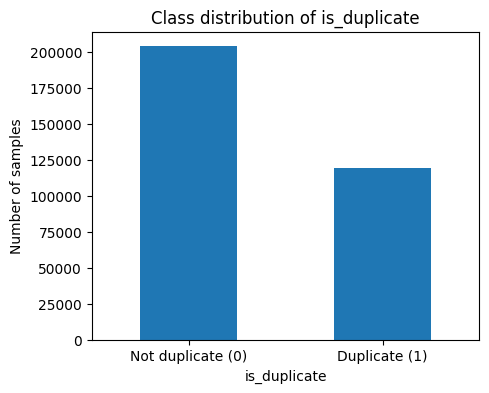

In [21]:
class_counts = df['is_duplicate'].value_counts()

plt.figure(figsize=(5, 4))
class_counts.plot(kind='bar')
plt.xticks([0, 1], ['Not duplicate (0)', 'Duplicate (1)'], rotation=0)
plt.ylabel('Number of samples')
plt.title('Class distribution of is_duplicate')
plt.show()


### Висновок

У наборі даних спостерігається суттєвий дисбаланс класів.  
Близько **63.1%** пар питань не є дублікатами, тоді як **36.9%** є дублікатами.

Дисбаланс класів слід враховувати під час навчання моделі та оцінювання результатів за допомогою метрики cross-entropy loss.


##Статистичний аналіз тексту

In [22]:
df['q1_len'] = df['question1'].str.split().str.len()
df['q2_len'] = df['question2'].str.split().str.len()

In [14]:
df[['q1_len', 'q2_len']].describe()

,q1_len,q2_len
count,323431.000000,323430.000000
mean,10.941688,11.184584
std,5.426277,6.312188
min,1.000000,1.000000
25%,7.000000,7.000000
50%,10.000000,10.000000
75%,13.000000,13.000000
max,125.000000,237.000000


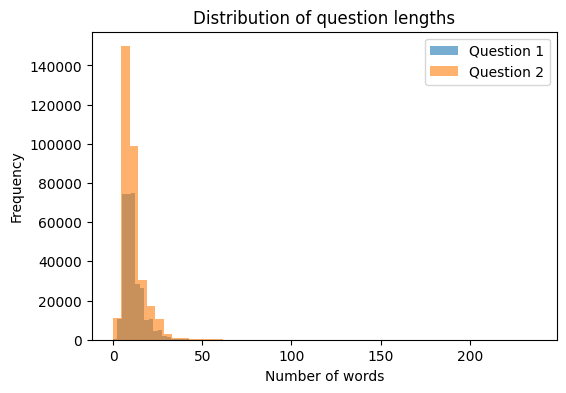

In [24]:
plt.figure(figsize=(6,4))
plt.hist(df['q1_len'], bins=50, alpha=0.6, label='Question 1')
plt.hist(df['q2_len'], bins=50, alpha=0.6, label='Question 2')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Distribution of question lengths')
plt.legend()
plt.show()


### Висновок

Після обробки пропущених значень було повторно проаналізовано довжину питань.

Середня довжина питання становить близько 11 слів, медіана — 10 слів.

Розподіл є помірно асиметричним з наявністю поодиноких довгих запитань, що є типовим для даних такого типу


##Кількість унікальних слів

In [25]:
q1_text = df['question1'].str.lower()
q2_text = df['question2'].str.lower()

all_text = q1_text + ' ' + q2_text

all_words = all_text.str.split()

all_words_list = []
for words in all_words:
    all_words_list.extend(words)

num_unique_words = len(set(all_words_list))


In [26]:
num_unique_words

178370

##Частота використання слів

In [27]:
word_freq = Counter(all_words_list)
word_freq.most_common(10)


[('the', 301024),
 ('what', 248837),
 ('is', 214823),
 ('how', 175297),
 ('i', 170697),
 ('a', 168388),
 ('to', 163514),
 ('in', 155567),
 ('of', 127085),
 ('do', 123789)]

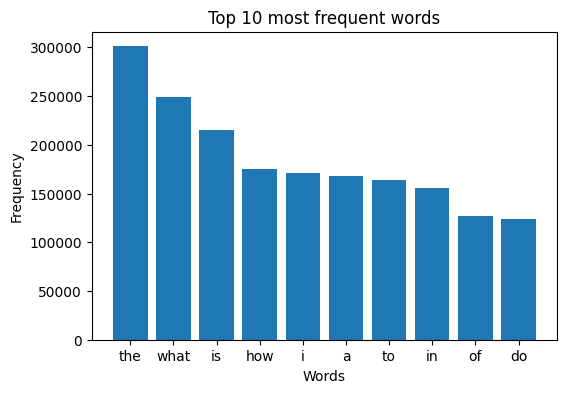

In [28]:
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(6,4))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 most frequent words')
plt.show()


###Висновок


Аналіз словникового складу показав, що датасет містить 178370 унікальних слів, що свідчить про велику різноманітність текстових даних.

Найпоширенішими словами є службові слова та типові слова для формулювання запитань (наприклад, the, what, is, how).

Такий розподіл є очікуваним для текстів природною мовою та підтверджує коректність і реалістичність даних.

Отримані результати вказують на необхідність використання методів попередньої обробки тексту або семантичних представлень на етапі моделювання для ефективного врахування різноманітності словника.